In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sn
from collections import Counter 
from sklearn.linear_model import LinearRegression
import scipy.stats as st
from sklearn.ensemble import RandomForestRegressor
import pylab

import statsmodels.api as sm

from sklearn.preprocessing import PolynomialFeatures


In [2]:
#These are the 5 sets of raw data that we have.

file = "csv_data/2015.csv"
file1 = "csv_data/2016.csv"
file2 = "csv_data/2017.csv"
file3 = "csv_data/2018.csv"
file4 = "csv_data/2019.csv"

In [3]:
# Dataframes by year.

df_2015 = pd.read_csv(file)
df_2016 = pd.read_csv(file1)
df_2017 = pd.read_csv(file2)
df_2018 = pd.read_csv(file3)
df_2019 = pd.read_csv(file4)

In [4]:
# Here we started the process of checking what our csvs looked like.
#We were interested in the # of rows and columns in each csv file. 

print("2015: ", df_2015.shape)
print("2016: ", df_2016.shape)
print("2017: ", df_2017.shape)
print("2018: ", df_2018.shape)
print("2019: ", df_2019.shape)

2015:  (158, 12)
2016:  (157, 13)
2017:  (155, 12)
2018:  (156, 9)
2019:  (156, 9)


In [5]:
# Next, we checked for any empty values in each individual year. Here we can see that 2015 did not have any empty values. 
df_2015.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
# After looking at the components of each year, we noticed the column names varied, so we decided to rename and drop columns
# so that all the years matched. 
df_2015.rename(columns={'Happiness Rank':'rank', 'Happiness Score':'score', 'Economy (GDP per Capita)': 'gdp',
                      'Health (Life Expectancy)': 'health', 'Trust (Government Corruption)': 'corruption',
                      "Dystopia Residual": "dystopia"},
                        inplace = True)
df_2015.columns = df_2015.columns.str.lower()
df_2015.columns

Index(['country', 'region', 'rank', 'score', 'standard error', 'gdp', 'family',
       'health', 'freedom', 'corruption', 'generosity', 'dystopia'],
      dtype='object')

In [7]:
df_2015.drop(columns = ['region', 'standard error'], inplace = True)
df_2015.sample(5)

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia
57,Peru,58,5.824,0.90019,0.97459,0.73017,0.41496,0.05989,0.14982,2.59450
40,Trinidad and Tobago,41,6.168,1.21183,1.18354,0.61483,0.55884,0.01140,0.31844,2.26882
76,Kyrgyzstan,77,5.286,0.47428,1.15115,0.65088,0.43477,0.04232,0.30030,2.23270
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
46,South Korea,47,5.984,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,2.21978


In [8]:
df_2016.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [9]:
df_2016.columns = df_2016.columns.str.lower()
df_2016.rename(columns={'happiness rank':'rank', 'happiness score':'score', 'economy (gdp per capita)': 'gdp',
                      'health (life expectancy)':'health', 'trust (government corruption)': 'corruption',
                      "dystopia residual": "dystopia"},
                       inplace = True)
df_2016.columns

Index(['country', 'region', 'rank', 'score', 'lower confidence interval',
       'upper confidence interval', 'gdp', 'family', 'health', 'freedom',
       'corruption', 'generosity', 'dystopia'],
      dtype='object')

In [10]:
df_2016.drop(columns = ['lower confidence interval','upper confidence interval',
                      'region'],
           inplace = True)
df_2016.sample(5)

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia
18,Ireland,19,6.907,1.48341,1.16157,0.81455,0.54008,0.29754,0.44963,2.15988
136,Botswana,137,3.974,1.09426,0.89186,0.34752,0.44089,0.10769,0.12425,0.96741
74,Hong Kong,75,5.458,1.51070,0.87021,0.95277,0.48079,0.31647,0.40097,0.92614
144,Burkina Faso,145,3.739,0.31995,0.63054,0.21297,0.33370,0.12533,0.24353,1.87319
29,Malta,30,6.488,1.30782,1.09879,0.80315,0.54994,0.17554,0.56237,1.99032


In [11]:
df_2017.isna().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [12]:
# This particular year had column names with periods instead of spaces, so we got rid of the periods
# and substituted spaces. 

df_2017.columns = df_2017.columns.str.replace(".", "")

# let's convert into lower case
df_2017.columns = df_2017.columns.str.lower()
df_2017.rename(columns = {"happinessrank": "rank", "happinessscore": "score", "healthlifeexpectancy": "health",
                        "economygdppercapita": "gdp", "trustgovernmentcorruption": "corruption",
                        "dystopiaresidual": "dystopia"}, inplace = True)
df_2017.columns

Index(['country', 'rank', 'score', 'whiskerhigh', 'whiskerlow', 'gdp',
       'family', 'health', 'freedom', 'generosity', 'corruption', 'dystopia'],
      dtype='object')

In [13]:
df_2017.drop(columns = ['whiskerhigh', 'whiskerlow'], inplace = True)
df_2017.sample(5)

,country,rank,score,gdp,family,health,freedom,generosity,corruption,dystopia
117,Gabon,118,4.465,1.198210,1.155620,0.356579,0.312329,0.043785,0.076047,1.322916
27,Uruguay,28,6.454,1.217560,1.412228,0.719217,0.579392,0.175097,0.178062,2.172410
134,Niger,135,4.028,0.161925,0.993025,0.268505,0.363659,0.228674,0.138573,1.873983
49,Belize,50,5.956,0.907975,1.081418,0.450192,0.547509,0.240016,0.096581,2.631956
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [14]:
# Here we found out we have one empty value in the corruptions column. We will
# need locate and clean up that empty value.
df_2018.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [15]:
df_2018.columns = df_2018.columns.str.lower()
df_2018.rename(columns = {"overall rank": "rank", "country or region": "country",
                         "freedom to make life choices": "freedom", "perceptions of corruption": "corruption",
                        "gdp per capita": "gdp", "healthy life expectancy": "health",
                        "social support": "family"}, inplace=True)
df_2018.columns = df_2018.columns.str.replace(" ", "_")
df_2018.columns

Index(['rank', 'country', 'score', 'gdp', 'family', 'health', 'freedom',
       'generosity', 'corruption'],
      dtype='object')

In [16]:
df_2019.columns = df_2019.columns.str.lower()
df_2019.rename(columns = {"overall rank": "rank", "country or region": "country",
                         "freedom to make life choices": "freedom", "perceptions of corruption": "corruption",
                        "gdp per capita": "gdp", "healthy life expectancy": "health",
                        "social support": "family"}, inplace=True)
df_2019.columns = df_2019.columns.str.replace(" ", "_")
df_2019.columns

Index(['rank', 'country', 'score', 'gdp', 'family', 'health', 'freedom',
       'generosity', 'corruption'],
      dtype='object')

In [17]:
df_2019.isna().sum()

rank          0
country       0
score         0
gdp           0
family        0
health        0
freedom       0
generosity    0
corruption    0
dtype: int64

In [18]:
# We printed out all the columns to compare them and make sure they are 
# named the same.

def print_all_dataframe_columns():
    print("2015:\n", df_2015.columns.to_list())
    print("\n2016:\n", df_2016.columns.to_list())
    print("\n2017:\n", df_2017.columns.to_list())
    print("\n2018:\n", df_2018.columns.to_list())
    print("\n2019:\n", df_2019.columns.to_list())
    
print_all_dataframe_columns()

2015:
 ['country', 'rank', 'score', 'gdp', 'family', 'health', 'freedom', 'corruption', 'generosity', 'dystopia']

2016:
 ['country', 'rank', 'score', 'gdp', 'family', 'health', 'freedom', 'corruption', 'generosity', 'dystopia']

2017:
 ['country', 'rank', 'score', 'gdp', 'family', 'health', 'freedom', 'generosity', 'corruption', 'dystopia']

2018:
 ['rank', 'country', 'score', 'gdp', 'family', 'health', 'freedom', 'generosity', 'corruption']

2019:
 ['rank', 'country', 'score', 'gdp', 'family', 'health', 'freedom', 'generosity', 'corruption']


In [19]:
# Our goal is to stack all of the csv files, but we still want to distinguish
# which year each row of info came from, so we are adding a column with each year.

df_2015['year'] = '2015'
df_2016['year'] = '2016'
df_2017['year'] = '2017'
df_2018['year'] = '2018'
df_2019['year'] = '2019'

df_2017.columns


Index(['country', 'rank', 'score', 'gdp', 'family', 'health', 'freedom',
       'generosity', 'corruption', 'dystopia', 'year'],
      dtype='object')

In [20]:
main_data = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019]).reset_index(drop=True)
main_data.shape
main_data.sample(5)

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia,year
684,Honduras,59,5.860,0.642000,1.236000,0.828000,0.507000,0.07800,0.246000,NaN,2019
213,Russia,56,5.856,1.232280,1.052610,0.589910,0.326820,0.03586,0.027360,2.591150,2016
598,Armenia,129,4.321,0.816000,0.990000,0.666000,0.260000,0.02800,0.077000,NaN,2018
621,Yemen,152,3.355,0.442000,1.073000,0.343000,0.244000,0.06400,0.083000,NaN,2018
382,Libya,68,5.525,1.101803,1.357564,0.520169,0.465733,0.09261,0.152074,1.835011,2017


In [21]:
# We noticed that for the years 2018 and 2019 the dystopia value is missing 


df_2018["dystopia"] = main_data["score"] - main_data["gdp"] - main_data["family"] - main_data["health"] - main_data["freedom"] - main_data["corruption"] - main_data["generosity"]

df_2019["dystopia"] = main_data["score"] - main_data["gdp"] - main_data["family"] - main_data["health"] - main_data["freedom"] - main_data["corruption"] - main_data["generosity"]



In [22]:
dim_main_data = pd.concat([df_2015, df_2016, df_2017]).reset_index(drop=True)
dim_main_data.sample(5)

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia,year
279,Kenya,122,4.356,0.522670,0.762400,0.301470,0.405760,0.066860,0.413280,1.883260,2016
266,Albania,109,4.655,0.955300,0.501630,0.730070,0.318660,0.053010,0.168400,1.928160,2016
408,Vietnam,94,5.074,0.788548,1.277491,0.652169,0.571056,0.087633,0.234968,1.462319,2017
49,Italy,50,5.948,1.251140,1.197770,0.954460,0.262360,0.029010,0.228230,2.025180,2015
21,Oman,22,6.853,1.360110,1.081820,0.762760,0.632740,0.325240,0.215420,2.474890,2015


In [23]:
main_data.country = main_data.country.str.lower().str.replace(" ", "_")

main_data.isna().sum()

country         0
rank            0
score           0
gdp             0
family          0
health          0
freedom         0
corruption      1
generosity      0
dystopia      312
year            0
dtype: int64

In [24]:
main_data[main_data.isna().values]

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia,year
470,finland,1,7.632,1.305,1.592,0.874,0.681,0.393,0.202,NaN,2018
471,norway,2,7.594,1.456,1.582,0.861,0.686,0.340,0.286,NaN,2018
472,denmark,3,7.555,1.351,1.590,0.868,0.683,0.408,0.284,NaN,2018
473,iceland,4,7.495,1.343,1.644,0.914,0.677,0.138,0.353,NaN,2018
474,switzerland,5,7.487,1.420,1.549,0.927,0.660,0.357,0.256,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...
777,rwanda,152,3.334,0.359,0.711,0.614,0.555,0.411,0.217,NaN,2019
778,tanzania,153,3.231,0.476,0.885,0.499,0.417,0.147,0.276,NaN,2019
779,afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.025,0.158,NaN,2019
780,central_african_republic,155,3.083,0.026,0.000,0.105,0.225,0.035,0.235,NaN,2019


In [25]:
main_data.loc[main_data.country == "united_arab_emirates"]

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia,year
19,united_arab_emirates,20,6.901,1.427270,1.12575,0.809250,0.641570,0.38583,0.264280,2.247430,2015
185,united_arab_emirates,28,6.573,1.573520,0.87114,0.729930,0.562150,0.35561,0.265910,2.215070,2016
335,united_arab_emirates,21,6.648,1.626343,1.26641,0.726798,0.608345,0.32449,0.360942,1.734704,2017
489,united_arab_emirates,20,6.774,2.096000,0.77600,0.670000,0.284000,NaN,0.186000,NaN,2018
646,united_arab_emirates,21,6.825,1.503000,1.31000,0.825000,0.598000,0.18200,0.262000,NaN,2019


In [26]:
avg_corruption = main_data.loc[main_data.country == "united_arab_emirates", "corruption"].mean()
main_data.corruption.fillna(avg_corruption, inplace=True)


In [27]:
main_data.isna().sum().any()

True

In [28]:
main_data.sample(5)

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia,year
664,trinidad_&_tobago,39,6.192,1.231000,1.477000,0.713000,0.489000,0.016000,0.185000,NaN,2019
180,united_kingdom,23,6.725,1.402830,1.086720,0.809910,0.500360,0.273990,0.501560,2.14999,2016
121,ethiopia,122,4.512,0.190730,0.604060,0.440550,0.434500,0.150480,0.243250,2.44876,2015
428,myanmar,114,4.545,0.367111,1.123236,0.397523,0.514492,0.188816,0.838075,1.11529,2017
78,bhutan,79,5.253,0.770420,1.103950,0.574070,0.532060,0.154450,0.479980,1.63794,2015


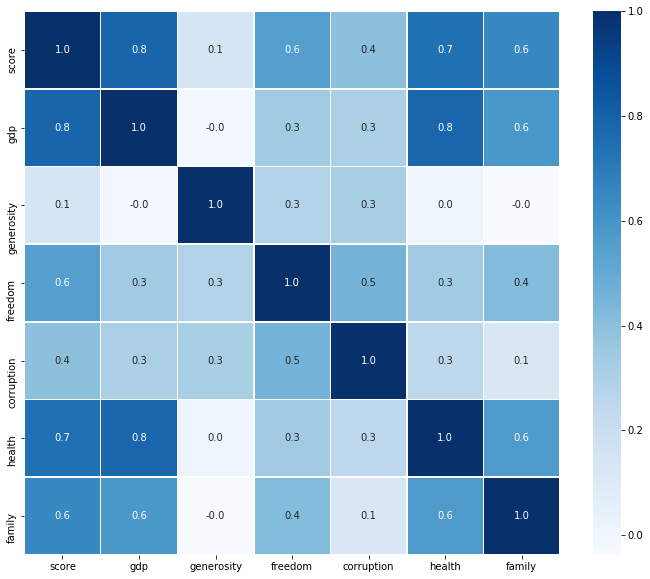

<Figure size 432x288 with 0 Axes>

In [29]:
#correlation map  2015-2019

categories = ["score", "gdp", "generosity", "freedom", "corruption", "health", "family"]
fig, ax = plt.subplots(figsize= (12, 10))
sn.heatmap(main_data[categories].corr(), annot=True, cmap="Blues", linewidths=.5, fmt=".1f", ax=ax)
plt.show()

plt.savefig('Graphs/heatmap_main_data.png')

#the happiness score has a strong linear relationship with GDP and Family (Social Support, and health (healthy life expectancy
#the happiness score is least correlated with generosity

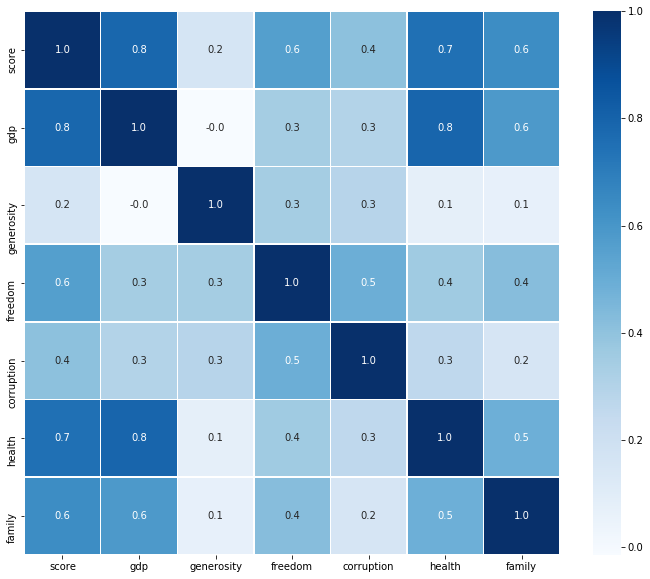

In [30]:
categories = ["score", "gdp", "generosity", "freedom", "corruption", "health", "family"]
fig, ax = plt.subplots(figsize= (12, 10))
sn.heatmap(dim_main_data[categories].corr(), annot=True, cmap="Blues", linewidths=.5, fmt=".1f", ax=ax)
plt.show()



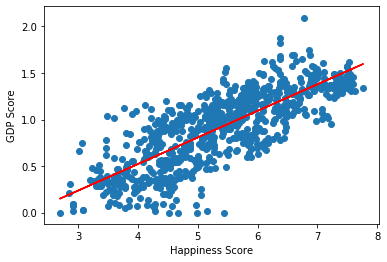

<Figure size 432x288 with 0 Axes>

In [31]:
#since GDP seems to have the greatest correlation with the happiness score, lets look at a linear regresion of the two
linear_regression = LinearRegression()

x = main_data.score.values.reshape(-1, 1)
y = main_data["gdp"].values.reshape(-1,1)



linear_regression.fit(x,y)

plt.scatter(main_data["score"], main_data["gdp"])
y_head = linear_regression.predict(x)
plt.plot(x, y_head, color = "red")
plt.xlabel("Happiness Score")
plt.ylabel("GDP Score")

plt.show()




plt.savefig('Graphs/gdp_score_lineregression.png')


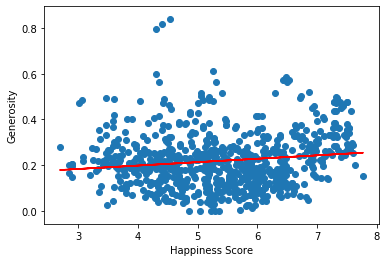

<Figure size 432x288 with 0 Axes>

In [34]:
linear_regression = LinearRegression()

x = main_data.score.values.reshape(-1, 1)
y = main_data["generosity"].values.reshape(-1,1)

linear_regression.fit(x,y)

plt.scatter(main_data["score"], main_data["generosity"])
y_head = linear_regression.predict(x)
plt.plot(x, y_head, color = "red")
plt.xlabel("Happiness Score")
plt.ylabel("Generosity")

plt.show()

plt.savefig('Graphs/final_generosity_score_lineregression.png')



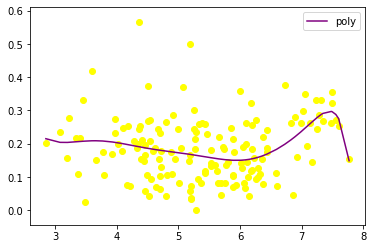

r_square score:  0.14235428752054957


In [36]:
x=df_2019.score.values.reshape(-1,1)
y=df_2019["generosity"].values.reshape(-1,1)
plt.scatter(df_2019["score"],df_2019["generosity"],color="yellow")

polynomial_regression=PolynomialFeatures(degree=15)
x_polynomial=polynomial_regression.fit_transform(x)

#%% fit
linear_regression2=LinearRegression()
linear_regression2.fit(x_polynomial,y)

#%%
y_head2=linear_regression2.predict(x_polynomial)

plt.plot(x,y_head2,color="purple",label="poly")
plt.legend()
plt.show()

from sklearn.metrics import r2_score
print("r_square score: ",r2_score(y,y_head2))


In [ ]:
x=df_2019["generosity"].values.reshape(-1,1)
y=df_2019["score"].values.reshape(-1,1).ravel()

rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x,y)

y_head=rf.predict(x)

#%% R-Square
from sklearn.metrics import r2_score
print("r_square: ",r2_score(y,y_head))

x_=np.arange(min(x),max(x),0.01).reshape(-1,1)
y_head=rf.predict(x_)

#%% Visualize
plt.scatter(x,y,color="red")
plt.plot(x_,y_head,color="green")
plt.xlabel("generosity")
plt.ylabel("score")
plt.show()

In [ ]:
linear_regression = LinearRegression()

x = main_data.score.values.reshape(-1, 1)
y = main_data["family"].values.reshape(-1,1)

linear_regression.fit(x,y)

plt.scatter(main_data["score"], main_data["family"])
y_head = linear_regression.predict(x)
plt.plot(x, y_head, color = "red")
plt.xlabel("Happiness Score")
plt.ylabel("Family")

plt.show()

plt.savefig('Graphs/family_score_lineregression.png')

In [ ]:
linear_regression = LinearRegression()

x = main_data.score.values.reshape(-1, 1)
y = main_data["health"].values.reshape(-1,1)

linear_regression.fit(x,y)

plt.scatter(main_data["score"], main_data["health"])
y_head = linear_regression.predict(x)
plt.plot(x, y_head, color = "red")
plt.xlabel("Happiness Score")
plt.ylabel("Health")

plt.show()

plt.savefig('Graphs/health_score_lineregression.png')

In [ ]:
linear_regression = LinearRegression()
x = main_data.score.values.reshape(-1, 1)
y = main_data["freedom"].values.reshape(-1,1)
linear_regression.fit(x,y)
plt.scatter(main_data["score"], main_data["freedom"])
y_head = linear_regression.predict(x)
plt.plot(x, y_head, color = "red")
plt.xlabel("Happiness Score")
plt.ylabel("Freedom")
plt.show()
plt.savefig('Graphs/freedom_score_lineregression.png')

In [ ]:
#correlation coefficient computation

score = main_data.iloc[:, 2]
gdp = main_data.iloc[:, 3]
correlation = st.pearsonr(score, gdp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

In [ ]:
play_data = np.random.normal(loc = 20, scale = 5, size=100)   
st.probplot(play_data, dist="norm", plot=pylab)
pylab.show()